In [1]:
pwd

'C:\\Users\\Ajitha A\\Datamites_project'

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [48]:
df = pd.read_csv('Heart_disease_pred.csv')
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,Target
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [49]:
df.drop(['patient_id'],axis=1, inplace= True)

# Exploratory Data Analysis (EDA)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

In [51]:
df.shape

(180, 14)

In [52]:
# Checking for any missing values

df.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
Target                                  0
dtype: int64

In [53]:
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,Target
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [54]:
df['thal'].unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [55]:
df['thal'].value_counts(dropna=False)

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

In [56]:
# Label encoding for 'thal' column as it has categorical value

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'hal'.
df['thal']= label_encoder.fit_transform(df['thal'])
df['thal'].unique()

array([1, 2, 0])

In [57]:
df.head(2)

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,Target
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0


# Understanding the data

- Correlation Matrix
- Correlation with target
- Bar graph for target classes

(14.5, -0.5)

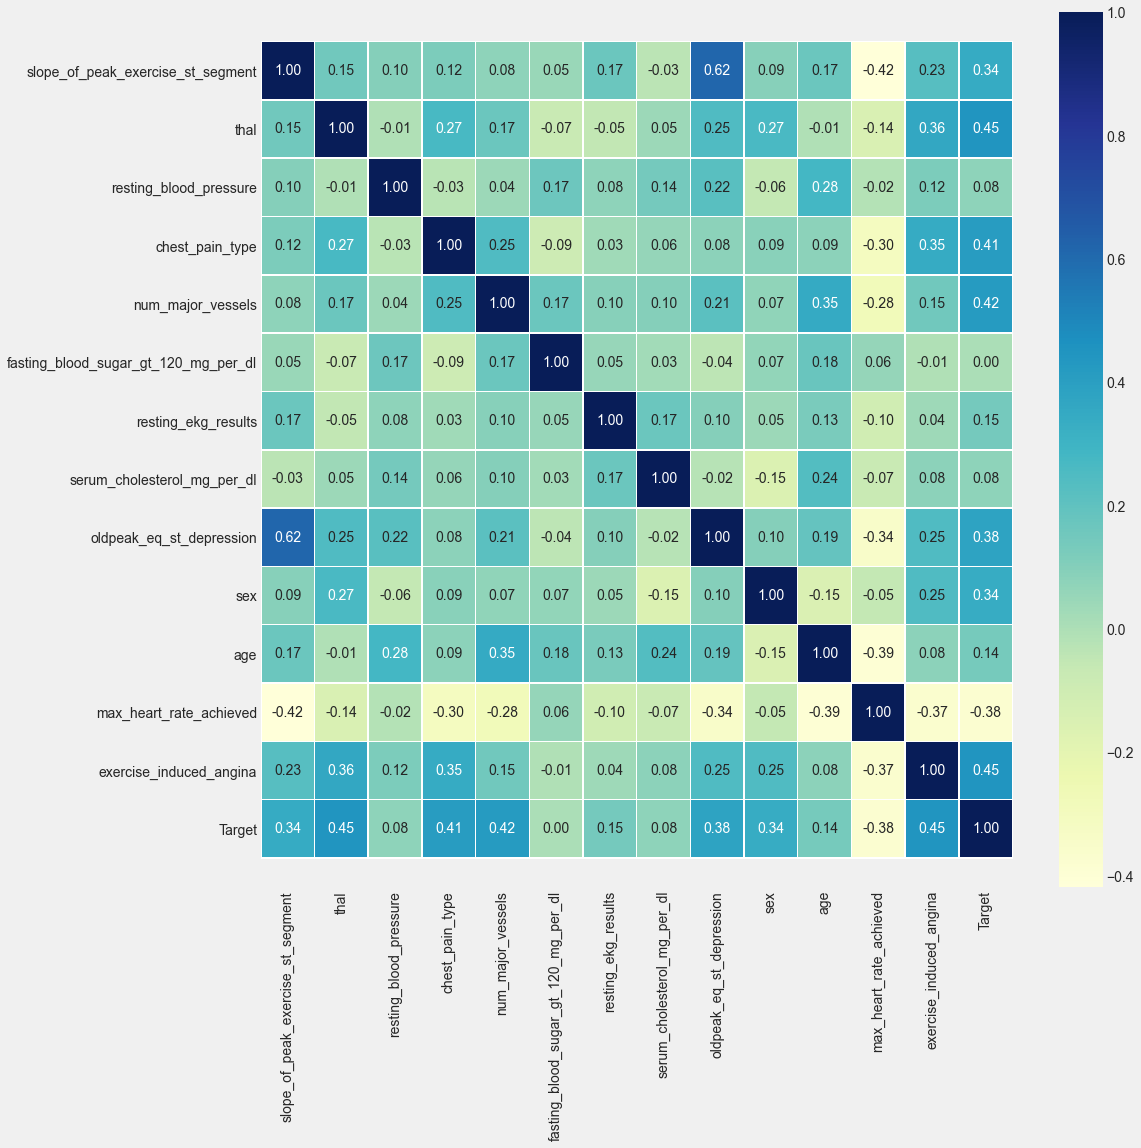

In [58]:
# To make a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Text(0.5, 1.0, 'Count of each Target Class')

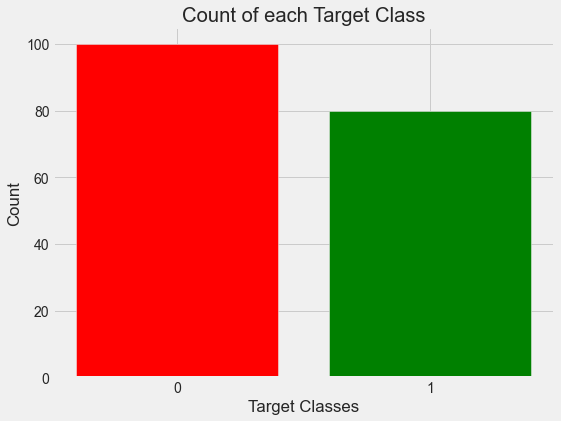

In [59]:
# Bar  plot for tagert

rcParams['figure.figsize'] = 8,6
plt.bar(df['Target'].unique(), df['Target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

<AxesSubplot:title={'center':'Correlation with Target'}>

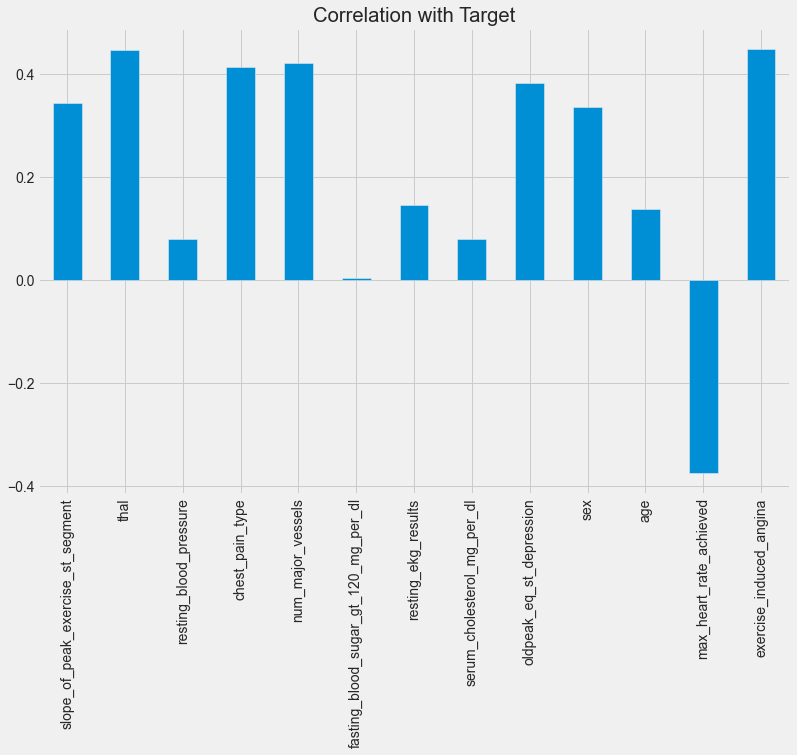

In [60]:
df.drop('Target', axis=1).corrwith(df.Target).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with Target")

# Data Processing

# Logistic Regression

In [61]:
X = df.iloc[:, :-1]
y = df.Target

In [62]:
X.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0


In [63]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: Target, dtype: int64

In [64]:
X.shape

(180, 13)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)

In [66]:
X_train.shape

(144, 13)

In [67]:
X_test.shape

(36, 13)

In [68]:
y_train.shape

(144,)

In [69]:
y_test.shape

(36,)

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1800)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1800)

In [71]:
X_test.head(2)

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
20,1,1,160,2,2,0,0,302,0.4,0,71,162,0
48,2,2,120,2,1,0,2,281,1.4,1,62,103,0


In [72]:
y_predict = model.predict(X_test)

In [73]:
y_predict

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8888888888888888

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[16,  1],
       [ 3, 16]], dtype=int64)

In [76]:
pd.crosstab(y_test, y_predict)

col_0,0,1
Target,,
0,16,1
1,3,16


In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.94      0.84      0.89        19

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.89      0.89      0.89        36



# KNN Model

In [99]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=50,p=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50, p=1)

In [100]:
Score = model.score(X_train, y_train)
Score

0.8055555555555556

In [101]:
from sklearn.metrics import accuracy_score, classification_report
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.9166666666666666

In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[17,  0],
       [ 3, 16]], dtype=int64)

In [103]:
pd.crosstab(y_test, y_predict)

col_0,0,1
Target,,
0,17,0
1,3,16


In [104]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       1.00      0.84      0.91        19

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.93      0.92      0.92        36



# Naive Bayes Model

In [105]:
# Feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [106]:
# Training the naive bayes model

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB( priors=None, var_smoothing=1)
classifier.fit(X_train, y_train)
y_predict1  =  classifier.predict(X_test)
y_predict

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [107]:
classifier.get_params

<bound method BaseEstimator.get_params of GaussianNB(var_smoothing=1)>

In [108]:
Score = classifier.score(X_train, y_train)
Score

0.8611111111111112

In [109]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test, y_predict1)
accuracy_score(y_test,y_predict1)

0.9166666666666666

In [110]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict1)

array([[16,  1],
       [ 2, 17]], dtype=int64)

In [111]:
pd.crosstab(y_test, y_predict1)

col_0,0,1
Target,,
0,16,1
1,2,17


In [112]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.94      0.89      0.92        19

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



# Random Forest 

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
RF = RandomForestClassifier(n_estimators = 10, max_depth =6, random_state = 30,
                           min_samples_split=3, min_samples_leaf=5,verbose=0,criterion='gini')
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=3,
                       n_estimators=10, random_state=30)

In [115]:
Score = RF.score(X_train, y_train)
Score

0.8819444444444444

In [116]:
y_pred = RF.predict(X_test)
accuracy_score(y_test, y_pred)

0.9444444444444444

In [463]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[17,  0],
       [ 2, 17]], dtype=int64)

In [464]:
pd.crosstab(y_test, y_pred)

col_0,0,1
Target,,
0,17,0
1,2,17


In [472]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.89      0.94        19

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



# SVM

In [465]:
from sklearn import svm

In [507]:
clf = svm.SVC(kernel='linear', gamma=1, decision_function_shape='ovo', 
              random_state= 101)

In [508]:
clf.fit(X_train, y_train)

SVC(decision_function_shape='ovo', gamma=1, kernel='linear', random_state=101)

In [509]:
y_preds = clf.predict(X_test)
accuracy_score(y_test, y_preds)

0.8888888888888888

In [486]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds)

array([[15,  2],
       [ 2, 17]], dtype=int64)

In [474]:
pd.crosstab(y_test, y_preds)

col_0,0,1
Target,,
0,15,2
1,2,17


In [475]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.89      0.89      0.89        19

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.89      0.89      0.89        36



# Decision tree

In [623]:
from sklearn.tree import DecisionTreeClassifier

In [662]:
DT = DecisionTreeClassifier(max_depth = 3, random_state = 42,  
                            min_samples_split=3, min_samples_leaf=5,
                            criterion='gini',min_weight_fraction_leaf=0.0)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=3,
                       random_state=42)

In [664]:
y_pred1 = DT.predict(X_test)
accuracy_score(y_test, y_pred1)

0.8611111111111112

In [667]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred1)

array([[15,  2],
       [ 3, 16]], dtype=int64)

In [668]:
pd.crosstab(y_test, y_pred1)

col_0,0,1
Target,,
0,15,2
1,3,16


In [669]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.89      0.84      0.86        19

    accuracy                           0.86        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36



# Overall modelperformance

In [31]:
Model_performance = [['LR', 0.89], ['RF', 0.94], ['KNN', 0.92], ['NB', 0.92], ['DT', 0.86], ['SVM', 0.89]]

In [33]:
df1 =  pd.DataFrame(Model_performance, columns = ['Model', 'Accuracy_score'])
df1

,Model,Accuracy_score
0,LR,0.89
1,RF,0.94
2,KNN,0.92
3,NB,0.92
4,DT,0.86
5,SVM,0.89


In [34]:
x1= df1.loc(0)
y1=df1.loc(1)

In [35]:
import matplotlib.pyplot as plot

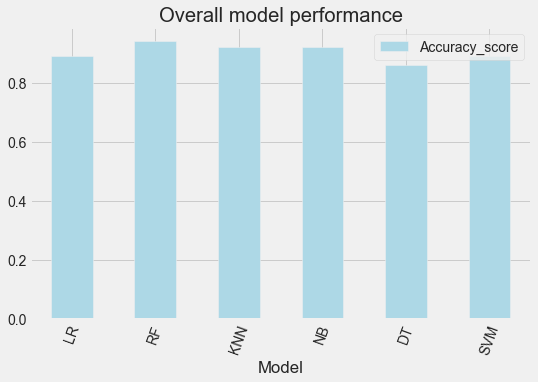

<Figure size 576x432 with 0 Axes>

In [36]:
df1.plot.bar(x="Model", y="Accuracy_score", rot=70, figsize=(8,5), color='LightBlue',title="Overall model performance")
plot.show(block=True)
plot.show()
plot.savefig('Overall model performance.png')

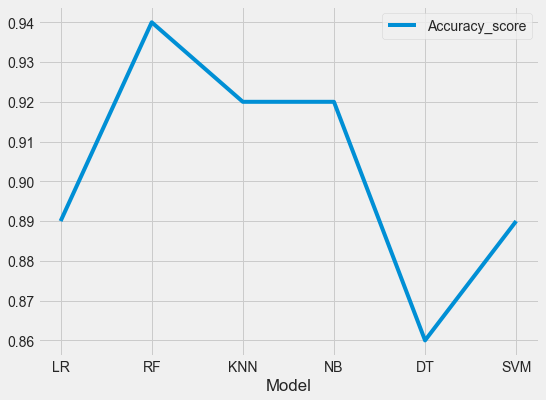

In [38]:
df1.plot(x ='Model', y='Accuracy_score', kind = 'line')
plt.show()

<AxesSubplot:>

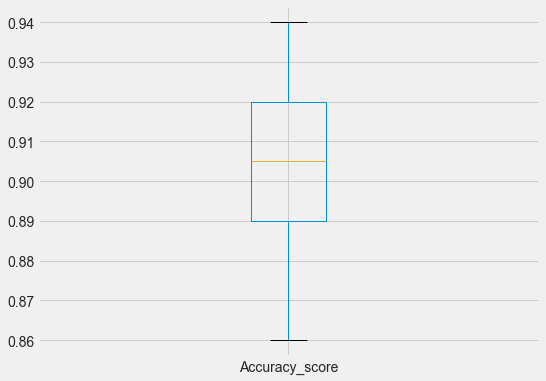

In [39]:
df1.boxplot()